In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Read the csv file and checking the first five observation

In [8]:
df = pd.read_csv('coalv2.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [9]:
df = df.iloc[:5000, ]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   moistr  5000 non-null   float64
 1   volmat  5000 non-null   float64
 2   fixedc  5000 non-null   float64
 3   ash     5000 non-null   float64
 4   hydrgn  5000 non-null   float64
 5   carbon  5000 non-null   float64
 6   nitrgn  5000 non-null   float64
 7   oxygen  5000 non-null   float64
 8   sulfur  5000 non-null   float64
 9   gcv     5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [10]:
# selecting features and label
X = df.iloc[:, :-1]  # features
y = df.iloc[:,-1]  #label

In [11]:
[X.shape,   y.shape]

[(5000, 9), (5000,)]

### Hyper parameter tuning using cross-validation for decision tree:
- The technique used below is particularly usefull if we have to change only one parameter of a model
- If parameter increases we have to use nested loop and when a model have lots of parameters to tinker with then the code becomes complicated
- GridSearchCV is the best option for the later case

In [12]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

depth_range = list(range(1, 31))
dt_scores = []
for k in depth_range:
    regressor = tree.DecisionTreeRegressor(max_depth=k)
    scores = cross_val_score(regressor, X, y, cv=10)
    dt_scores.append(scores.mean())
print(dt_scores)

[0.3764260125197562, 0.7800816328544193, 0.9135329357079757, 0.9511462737535231, 0.9600584499687675, 0.9714065131167869, 0.974419319535959, 0.9774549494012044, 0.9788427089660031, 0.9775453901586226, 0.9779097490457657, 0.9776226361330375, 0.9762900265043193, 0.9775566981698661, 0.9758257759229675, 0.9754576013601721, 0.9765746804277947, 0.9763564732708151, 0.9774616145001177, 0.9760263579880698, 0.9763454881730771, 0.9767779931873026, 0.9742224074596884, 0.9767292609596552, 0.9775835441983955, 0.9765603002044381, 0.9762924525788502, 0.9763594781460373, 0.9768030626019829, 0.9752161470307452]


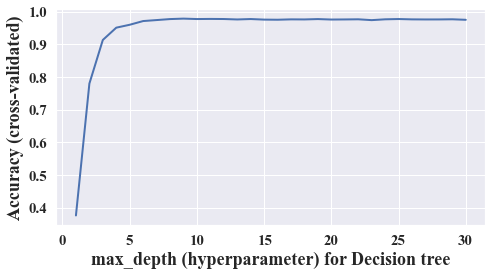

In [27]:
# plot the value of max_depth for decision tree (x-axis) versus the cross-validated accuracy (y-axis)

#plt.style.use('ggplot')
plt.figure(figsize=(7, 4))
plt.plot(depth_range, dt_scores, linewidth=2)
plt.xlabel('max_depth (hyperparameter) for Decision tree', fontsize=18, fontweight='bold', fontfamily='Times new roman')
plt.ylabel('Accuracy (cross-validated)', fontsize=18, fontweight='bold', fontfamily='Times new roman')
plt.xticks(fontsize=15, fontweight='bold', fontfamily='Times new roman')
plt.yticks(fontsize=15, fontweight='bold', fontfamily='Times new roman')
plt.tight_layout()

plt.savefig('decision_tree_max_depth_vs_cross_validated_accuracy.png', dpi=300)


In [24]:
# Return the max value of the list
max_value = max(dt_scores)
print(max_value)

# find the index of the max value
max_index = dt_scores.index(max_value)
max_index

0.9897765935238217


11

### The optimum max_depth value for this model:

In [25]:
max_depth_value = max_index + 1
print("optimum max_depth:", str(max_depth_value))

optimum max_depth: 12


In [27]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(regressor, X, y, cv=10)
pred


array([13276., 12250., 13245., ...,  6922., 13200., 14043.])